In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(-3.0, 3.0, -1.0, 1.5)

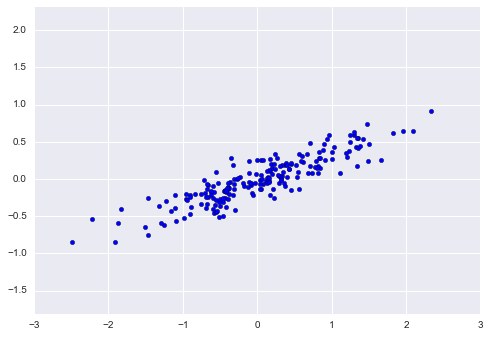

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [4]:
from sklearn.decomposition import PCA
model = PCA(2)
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
model.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [6]:
model.explained_variance_

array([ 0.75871884,  0.01838551])

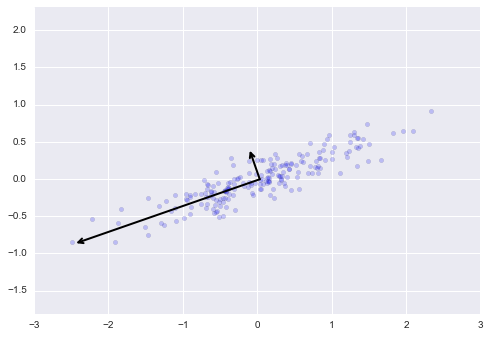

In [8]:
def draw_vector(v0, v1, ax=None): 
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(model.explained_variance_, model.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(model.mean_, model.mean_ + v)
plt.axis('equal');

In [11]:
pca = PCA(1)
pca.fit(X)
Xp = pca.transform(X)
print X.shape, Xp.shape

(200, 2) (200, 1)


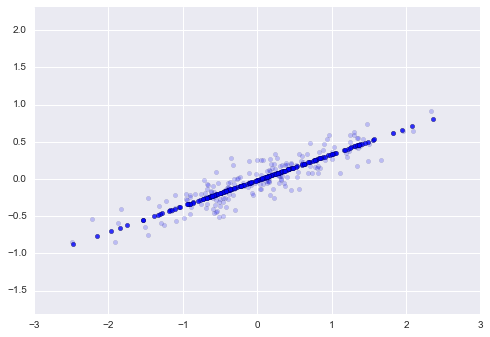

In [15]:
X_new = pca.inverse_transform(Xp)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
pca = PCA(2) # project from 64 to 2 dimensions 
projected = pca.fit_transform(digits.data) 
print(digits.data.shape) 
print(projected.shape)

(1797, 64)
(1797, 2)


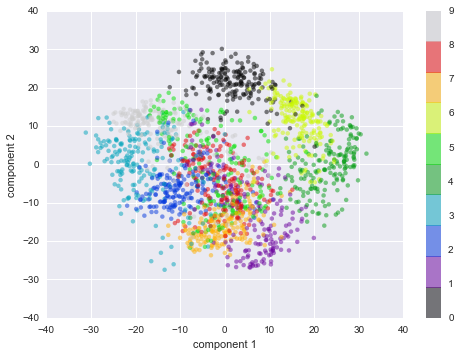

In [19]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

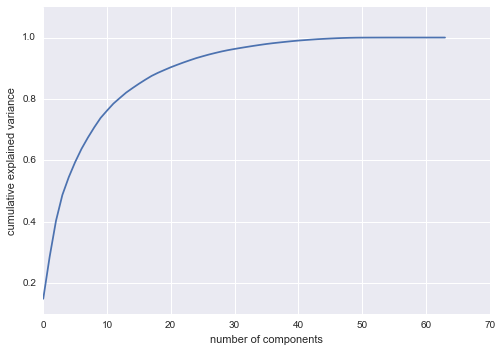

In [20]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
pca.explained_variance_ratio_

array([  1.48905936e-01,   1.36187712e-01,   1.17945938e-01,
         8.40997942e-02,   5.78241466e-02,   4.91691032e-02,
         4.31598701e-02,   3.66137258e-02,   3.35324810e-02,
         3.07880621e-02,   2.37234084e-02,   2.27269657e-02,
         1.82186331e-02,   1.77385494e-02,   1.46710109e-02,
         1.40971560e-02,   1.31858920e-02,   1.24813782e-02,
         1.01771796e-02,   9.05617439e-03,   8.89538461e-03,
         7.97123157e-03,   7.67493255e-03,   7.22903569e-03,
         6.95888851e-03,   5.96081458e-03,   5.75614688e-03,
         5.15157582e-03,   4.89539777e-03,   4.28887968e-03,
         3.73606048e-03,   3.53274223e-03,   3.36683986e-03,
         3.28029851e-03,   3.08320884e-03,   2.93778629e-03,
         2.56588609e-03,   2.27742397e-03,   2.22277922e-03,
         2.11430393e-03,   1.89909062e-03,   1.58652907e-03,
         1.51159934e-03,   1.40578764e-03,   1.16622290e-03,
         1.07492521e-03,   9.64053065e-04,   7.74630271e-04,
         5.57211553e-04,

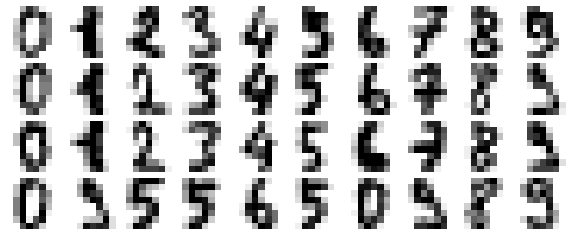

In [22]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

        
plot_digits(digits.data)

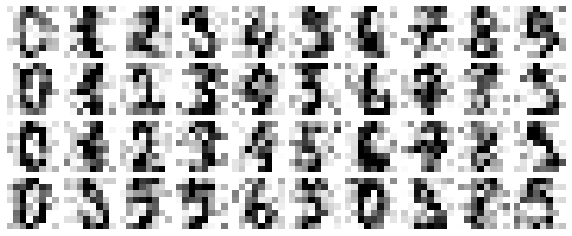

In [23]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [24]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

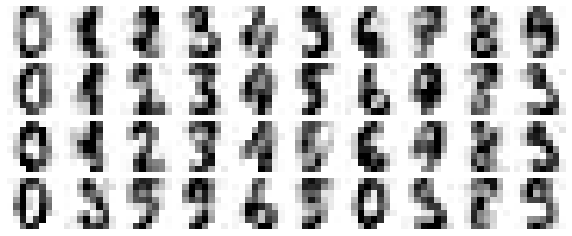

In [25]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [26]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [27]:
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

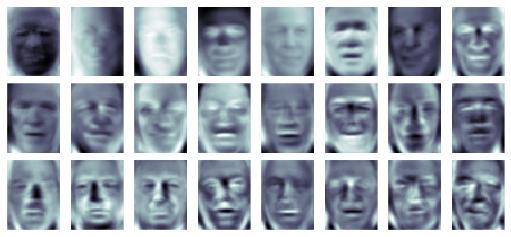

In [28]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

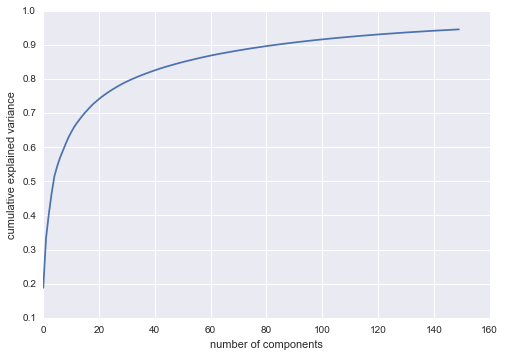

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

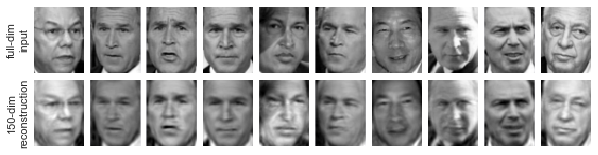

In [30]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r') 
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [31]:
62*47

2914